# 1- Análise Bidimensional
- A análise bidimensional envolve a análise de duas variáveis simultaneamente para entender a relação entre elas. É uma extensão da análise unidimensional, que se concentra em uma única variável.

## 1.2 - Variáveis Qualitativas
- Por exemplo, queremos verificar se a criação de determinado tipo de cooperativa está associada com algum fator regional:
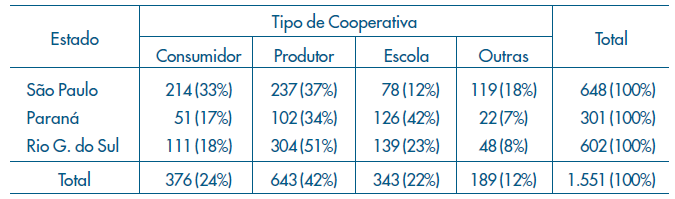

- A análise da tabela mostra a existência de certa dependência entre as variáveis. Caso não houvesse associação, esperaríamos que em cada estado tivéssemos 24% de cooperativas de consumidores, 42% de cooperativas de produtores, 22% de escolas e 12% de outros tipos. Então, por exemplo, o número esperado de cooperativas de consumidores no Estado de São Paulo seria 648 × 0,24 = 157 e no Paraná seria 301 × 0,24 = 73.
- **Valores esperados assumindo a independência entre as duas variáveis:**

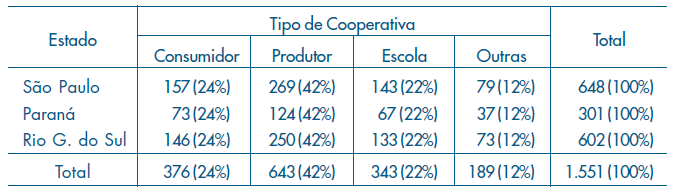

### 1.2.1 -Teste de Qui-Quadrado
- O **teste do qui-quadrado** é uma técnica estatística usada para avaliar a associação entre duas variáveis categóricas em uma tabela de frequência. Ele testa se existe uma relação significativa entre as variáveis ou se elas são independentes uma da outra.
- O teste calcula o qui-quadrado (χ²), que é uma medida da diferença entre as frequências observadas e as frequências esperadas sob a hipótese nula de independência. Quanto maior for o valor do qui-quadrado, maior é a evidência de que as variáveis não são independentes
    - Para realizar o teste do qui-quadrado, são definidas as seguintes hipóteses:
        - **Hipótese nula (H0):** As variáveis são independentes uma da outra.
        - **Hipótese alternativa (H1 ou HA):** As variáveis estão associadas de alguma maneira, não são independentes.
        - O teste produz um valor de p (valor-p), que é a probabilidade de observar os dados observados ou um valor mais extremo, assumindo que a hipótese nula seja verdadeira. Um valor-p baixo indica que os dados observados são improváveis de ocorrer sob a hipótese nula, o que sugere que devemos rejeitar a hipótese nula em favor da hipótese alternativa.
- **O princípio básico deste método é comparar proporções, isto é, as possíveis divergências entre as frequências observadas e esperadas para um certo evento.**  
- A fórmula do qui-quadrado para uma tabela de contingência é:

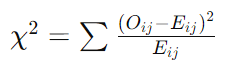

- Exemplo:
    - Em uma amostra com 100 observações e 5 categorias, se não houvesse prevalência esperaríamos que cada categoria tivesse 20 observações.
    - Esta premissa é baseada na expectativa de que, se não houver associação entre as variáveis, a proporção de observações em cada categoria seria uniforme. Ao dividir por 5, você está distribuindo igualmente as observações ao longo das categorias.
    - Elevamos ao quadrado a diferença para que os resultados não se anulem(mesmo princípio do calculo da variância), em seguida dividimos pela frequência esperada para retornarmos para a unidade de medida anterior.
    
    
| Variável | Frequencia | Freq. Esperada | Diferença | Diferença² | Diferença² / Freq. Esperada |
|----------|------------|----------------|-----------|------------|-----------------------------|
| A        | 38         | 20             | 18        | 324        | 16.2                        |
| B        | 25         | 20             | 5         | 25         | 1.25                        |
| C        | 16         | 20             | -4        | 16         | 0.8                         |
| D        | 12         | 20             | -8        | 64         | 3.2                         |
| E        | 9          | 20             | -11       | 121        | 6.05                        |
| **Soma** |            |                |           |            | **27.5**                    |
    
    
- Em sequida precisamos calcular Graus de Liberdade, representado pela equação: gl= K - 1.
- Em que K se refere ao número de categorias na distribuição de frequência observada.
    - gl = 5-1
    - gl = 4
- X² crítico = 9,488(significância = 0,05) -> Valor encontrado na tabela de distribuição Qui-quadrado.

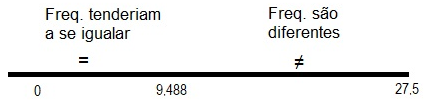


- O valor está acima do valor crítico, portanto existe uma diferença estatisticamente significativa entre os grupos.
- Quando temos uma tabela de contigência com duas colunas ou mais o cálculo da frequência esperada é um pouco diferente: 

|               | Variável Y1 | Variável Y2 | Total por Linha |
|---------------|----------|----------|-----------------|
| Variável X1       |          |          |                 |
| Variável X2       |          |          |                 |
| Variável X3       |          |          |                 |
| Total por Coluna |          |          | Total Geral     |

- Frequência Esperada = (Total na linha) X (Total na Coluna) / Total Geral da Tabela
- Vamos utilizar um dataset para demonstrar este cálculo:

In [1]:
library('readr')
carros <- read_csv('carros-usados.csv')
head(carros)

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): modelo, cor, transmissao
dbl (3): ano, preco, kilometragem

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ano,modelo,preco,kilometragem,cor,transmissao
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2011,SEL,21992,7413,Bege,AUTO
2011,SEL,20995,10926,Cinza,AUTO
2011,SEL,19995,7351,Prata,AUTO
2011,SEL,17809,11613,Cinza,AUTO
2012,SE,17500,8367,Branco,AUTO
2010,SEL,17495,25125,Prata,AUTO


- Vamos utilizar a função **CrossTable** do pacote gmodels para criar tabelas de contingência (tabelas cruzadas) e realizar testes estatísticos de associação entre variáveis categóricas.
- Ao criar uma tabela cruzada, as variáveis são dispostas em linhas e colunas, e as células contêm as contagens ou frequências de observações que se enquadram nas combinações específicas dessas variáveis. A tabela fornece uma visão compacta e organizada dos padrões nas categorias das variáveis, o que pode ajudar na identificação de associações ou padrões.

In [2]:
library('gmodels')
CrossTable(x = carros$modelo, y = carros$transmissao, prop.chisq = TRUE, chisq = TRUE)

Warning message in chisq.test(t, correct = FALSE, ...):
"Aproximação do qui-quadrado pode estar incorreta"



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
              | carros$transmissao 
carros$modelo |      AUTO |    MANUAL | Row Total | 
--------------|-----------|-----------|-----------|
           SE |        63 |        15 |        78 | 
              |     0.190 |     1.108 |           | 
              |     0.808 |     0.192 |     0.520 | 
              |     0.492 |     0.682 |           | 
              |     0.420 |     0.100 |           | 
--------------|-----------|-----------|-----------|
          SEL |        22 |         1 |        23 | 
              |     0.287 |     1.670 |           | 
              |     0.957 |     0.043 |     0.153 | 
              |     0.172 |     0.045 |           | 
              |     0.147 |     0.007 |           | 
--------------|-----

- Explicação da Tabela: 

| Variável X      | Variável Y      |                | Total da linha |
|-----------------|-----------------|----------------|----------------|
| Nome            | Nome            | Nome           |                |
|                 | N. observações  | N. observações |  Total         |
|                 | Freq. Esperada  | Freq. Esperada |                |
|                 | % por linha     | % por linha    | % pelo total   |
|                 | % por coluna    | % por coluna   |                |
|                 | % pelo total    | % pelo total   |                |
|-----------------|-----------------|----------------|----------------|
| Column Total    | Total Coluna    | Total Coluna   | Total geral    |
|                 | % pelo total    | % pelo total   |                |

---
- **Cálculo para primeira linha e primeira coluna da frequência esperada:**
    - Para primeira observação temos: (78 X 128)/150= 66,56
    
| Variável | Frequência | Freq. Esperada | Diferença | Diferença² | Diferença² / Freq. Esperada |
|----------|------------|----------------|-----------|------------|-----------------------------|
| SE       | 63         | 66,56          | -3,56     | 12,67      | 0,190                       |

- Obs.: Ao setarmos prop.chisq = TRUE, o R já calcula a frequência esperada automaticamente, bem como o resultado do teste de qui-quadrado.
---
- No contexto do teste do qui-quadrado, a **hipótese nula (H0)** afirma que não há associação entre as variáveis categóricas em estudo. Em outras palavras, a distribuição das categorias em uma variável não é influenciada pela distribuição da outra variável; são independentes. 
- Por outro lado, a **hipótese alternativa (H1/ HA)** contradiz isso e sugere que há alguma associação ou dependência entre as variáveis categóricas.
- Portanto, ao realizarmos o teste do qui-quadrado para independência, estamos avaliando se as diferenças entre as frequências observadas e esperadas são grandes o suficiente para sugerir que as variáveis não são independentes, ou seja, há uma associação significativa entre elas. 
- Se as frequências observadas e esperadas fossem consistentes(não há diferença significativa), isso apoiaria a ideia de que as variáveis são independentes.
- O valor do qui-quadrado calculado é 3.48463 com 2 graus de liberdade. O valor-p associado a este teste é 0.1751145.
- O valor-p de 0.1751145 é maior do que o nível de significância comumente usado ( 0.05). Portanto, não há evidência suficiente para rejeitar a hipótese nula.
- **Com base nos resultados do teste qui-quadrado de Pearson, não encontramos uma associação estatisticamente significativa entre as variáveis analisadas.**
---
- **Agora vamos realizar outro teste de qui-quadrado para os dados de tipo de cooperativa:**

In [3]:
# Criando o dataframe
dados <- data.frame(
  Estado = c('São Paulo', 'Paraná', 'Rio G. do Sul'),
  Consumidor = c(214, 51, 111),
  Produtor = c(237, 102, 304),
  Escola = c(78, 126, 139),
  Outras = c(119, 22, 48),
  stringsAsFactors = FALSE
)


dados

Estado,Consumidor,Produtor,Escola,Outras
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
São Paulo,214,237,78,119
Paraná,51,102,126,22
Rio G. do Sul,111,304,139,48


In [4]:
# Transformando os dados em uma tabela de contingência
dados_tabela <- as.table(as.matrix(dados[,-1]))
rownames(dados_tabela) <- dados$Estado
dados_tabela 

              Consumidor Produtor Escola Outras
São Paulo            214      237     78    119
Paraná                51      102    126     22
Rio G. do Sul        111      304    139     48

In [5]:
# Realizando o teste de qui-quadrado
chisq.test(dados_tabela)


	Pearson's Chi-squared test

data:  dados_tabela
X-squared = 173.38, df = 6, p-value < 2.2e-16


 - Conforme já havíamos verificado, como o p-valor é menor que 2.2e-16, que é muito menor que 0.05, rejeitamos a hipótese nula. Isso sugere que há uma associação estatisticamente significativa entre as categorias e os estados, ou seja, as variáveis não são independentes e há uma associação entre as categorias e os Estados.
 
## 1.3 - Variáveis Quantitativas

### 1.3.1 - Gráfico de Dispersão
- O gráfico de dispersão, também conhecido como gráfico de pontos ou scatter plot, é uma ferramenta gráfica utilizada para exibir a relação entre duas variáveis quantitativas. Cada ponto no gráfico representa uma observação do conjunto de dados, com suas coordenadas (x, y) representando os valores das duas variáveis correspondentes.
- - **Obs.: Gráficos de dispersão podem ter limitações quando se trata de identificar relações não lineares sem uma análise adicional.** 

In [6]:
# Gerando uma massa de dados
set.seed(42)
Variable_A <- rnorm(500, mean = 50, sd = 10)
Variable_B <- 2 * Variable_A + rnorm(500, mean = 0, sd = 5)
data1 <- data.frame(Variable_A, Variable_B)
head(data1)

,Variable_A,Variable_B
,<dbl>,<dbl>
1,63.70958,132.56487
2,44.35302,93.27991
3,53.63128,107.25029
4,56.32863,113.33730
5,54.04268,104.48460
6,48.93875,96.88689


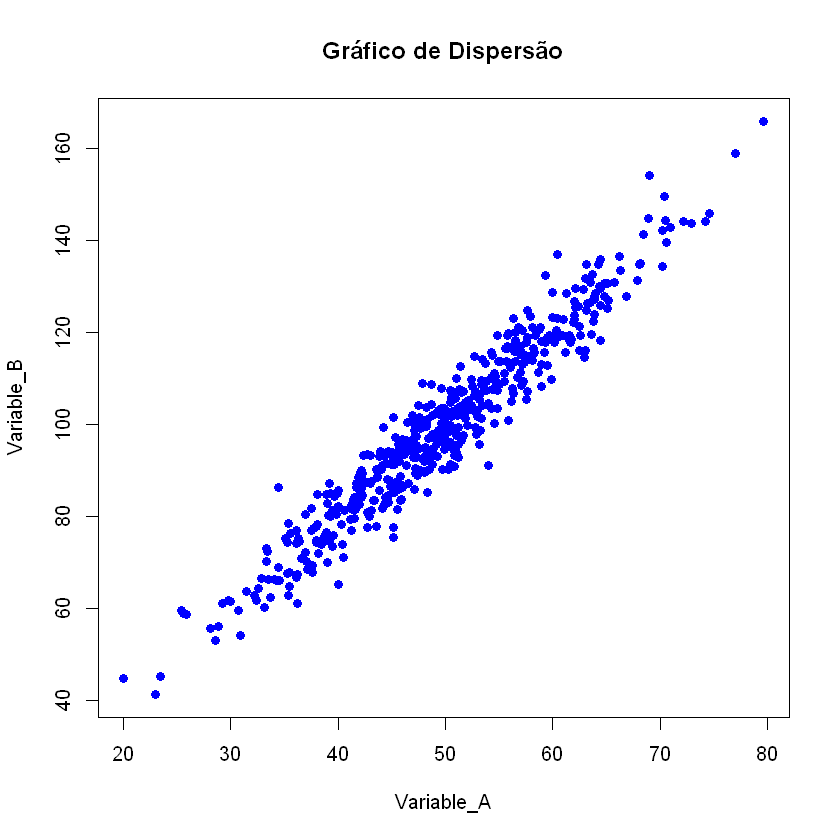

In [7]:
# Gráfico de Dispersão
plot(data1$Variable_A, data1$Variable_B, 
     main = 'Gráfico de Dispersão', 
     xlab = 'Variable_A', ylab = 'Variable_B', 
     pch = 19, col = 'blue')

### 1.3.2 - Análise de Correlação
- A correlação é uma ferramenta estatística fundamental usada para medir e descrever a relação entre duas variáveis. Existem vários coeficientes de correlação, mas os mais comumente usados são o Coeficiente de Correlação de Pearson e o Coeficiente de Correlação de Spearman.

### 1.3.2.1  - Coeficiente de Correlação de Pearson

- O Coeficiente de Correlação de Pearson (r) mede a força e a direção da relação linear entre duas variáveis contínuas. Ele assume que as variáveis são aproximadamente distribuídas de forma normal e que a relação entre elas é linear.
- A fórmula do coeficiente de correlação de Pearson é:

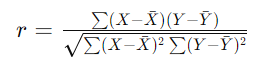

- X e Y são as variáveis.
- Xˉ e Yˉ são as médias das variáveis.
- Valores do coeficiente de Pearson variam entre -1 e 1:
    - r=1 indica uma correlação linear positiva perfeita,
    - r=−1 indica uma correlação linear negativa perfeita,
    - r=0 indica nenhuma correlação linear.

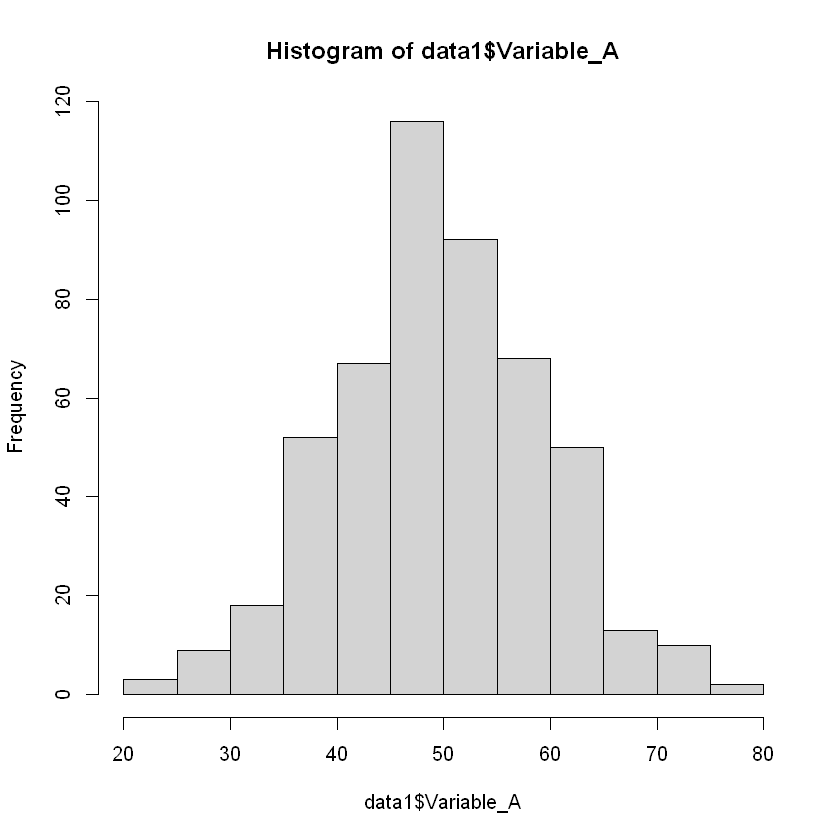

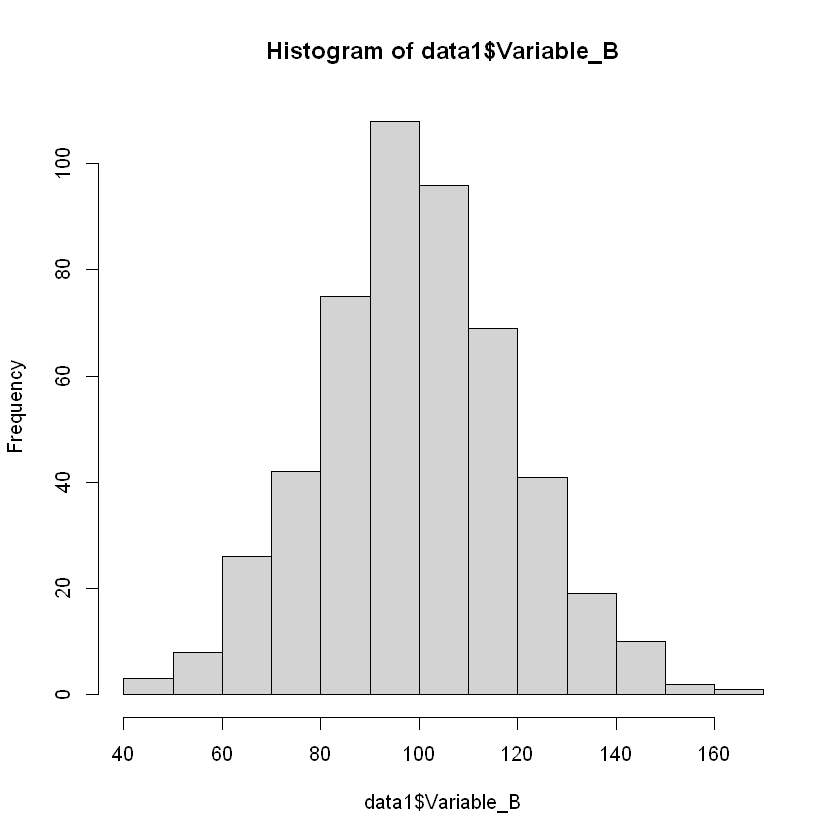

In [8]:
hist(data1$Variable_A)
hist(data1$Variable_B)

In [9]:
# Calculando o coeficiente de correlação de Pearson
cor(data1$Variable_A, data1$Variable_B, method = 'pearson')

[1] 0.966345

### 1.3.2.2  - Coeficiente de Correlação de Spearman
- O Coeficiente de Correlação de Spearman (ρ ou rho) mede a força e a direção da relação monotônica entre duas variáveis, baseado nos rankings. Ele não assume normalidade dos dados e pode capturar relações não lineares. É especialmente útil quando os dados contêm outliers ou não seguem uma distribuição normal. A fórmula do coeficiente de correlação de Spearman é:

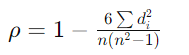

- ρ: Representa o coeficiente de correlação de Spearman.
- di : Representa a diferença entre os ranks das duas variáveis para cada par de observações. Se você tiver duas variáveis X e  Y, di é a diferença entre o rank deX e o rank de Y para a i-ésima observação.
- n: É o número de observações ou pares de dados.
- O coeficiente de correlação de Spearman é baseado nos ranks dos dados em vez de nos valores brutos. Isso o torna capaz de capturar qualquer tipo de relação monotônica, seja linear ou não, e é menos sensível a outliers.
---
- **Passo a Passo do Cálculo:**
    - Primeiro, para cada variável, substituímos os valores reais por suas posições na ordem crescente (ranks). Se houver empates (valores iguais), os ranks devem ser calculados como a média dos ranks das posições empatadas.
       - Suponha que temos 5 pares de observações para X e Y:
       
| Observção  |Variável X|Variável Y|
|------------|----------|----------|
| 1          |   10     |    8     |
| 2          |   20     |    6     |            
| 3          |   30     |    4     |          
| 4          |   40     |    10    | 
| 5          |   50     |    12    | 

- Ordenar e Ranquear:

| Observação | X  | Rank de X | Y  | Rank de Y |
|------------|----|-----------|----|-----------|
| 1          | 10 | 1         | 8  | 3         |
| 2          | 20 | 2         | 6  | 2         |
| 3          | 30 | 3         | 4  | 1         |
| 4          | 40 | 4         | 10 | 4         |
| 5          | 50 | 5         | 12 | 5         |

- Calcular Diferenças dos Ranks e os quadrados das diferenças:

| Observação | X  | Rank de X | Y  | Rank de Y | di        |    di²      |
|------------|----|-----------|----|-----------|-----------|-------------|
| 1          | 10 | 1         | 8  | 3         | -2        | 4           |
| 2          | 20 | 2         | 6  | 2         | 0         | 0           |
| 3          | 30 | 3         | 4  | 1         | 2         | 4           |
| 4          | 40 | 4         | 10 | 4         | 0         | 0           |
| 5          | 50 | 5         | 12 | 5         | 0         | 0           |

- Soma dos Quadrados das Diferenças: 
    - 4+0+4+0+0=8
- Aplicar na Fórmula: 
    - ρ= 1 - (6x8)/5(5²-1) =  
    - ρ= 1 - 48/(5x24) = 
    - ρ= 1 - 48/120
    - ρ= 1 - 1 - 0.4 = 0.6
- Assim, o coeficiente de correlação de Spearman para este exemplo é 0.6, indicando uma correlação monotônica positiva moderada entre as variáveis.
- Uma relação monotônica entre duas variáveis é uma relação onde, conforme uma variável aumenta, a outra variável tende a aumentar (relação monotônica positiva) ou a diminuir (relação monotônica negativa), mas não necessariamente de maneira linear.

In [10]:
# Definindo a semente para reprodutibilidade
set.seed(42)

# Gerando variáveis com distribuição exponencial
Variable_C <- rexp(500, rate = 0.1)
Variable_D <- 2 * Variable_C + rexp(500, rate = 0.1)
data2 <- data.frame(Variable_C, Variable_D)
head(data2)

,Variable_C,Variable_D
,<dbl>,<dbl>
1,1.983368,7.46971
2,6.608953,13.24280
3,2.834910,11.80848
4,0.381919,23.24439
5,4.731766,10.80352
6,14.636271,30.05636


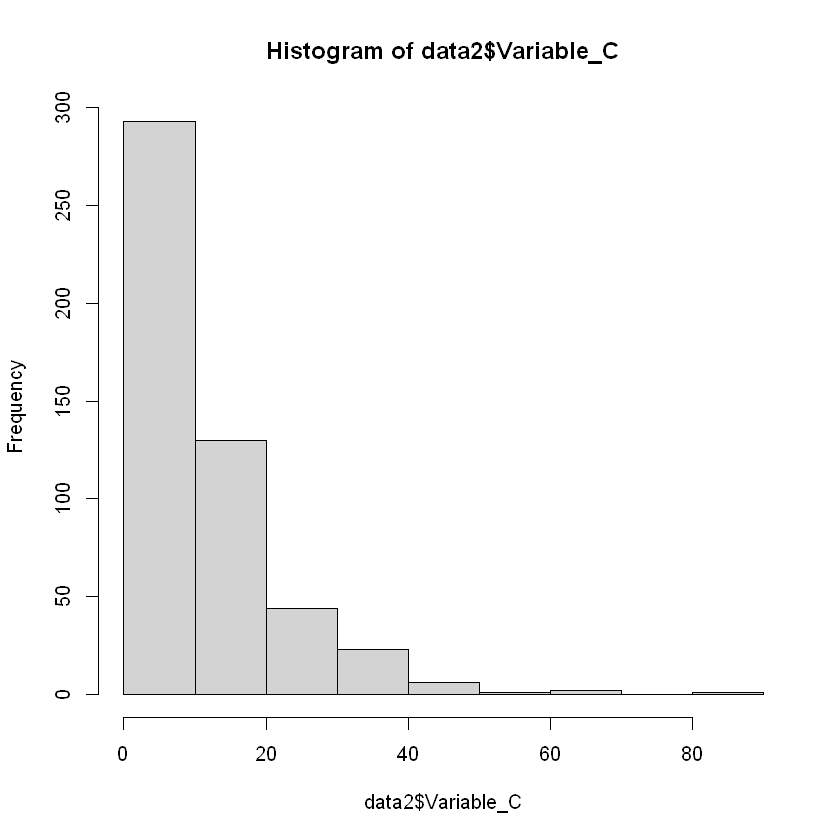

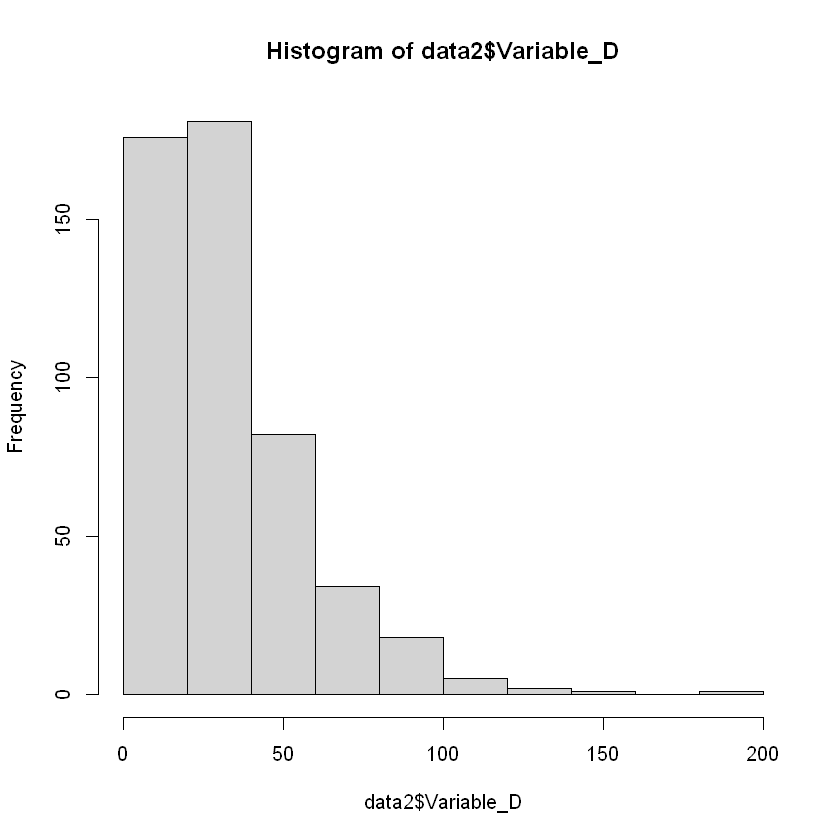

In [11]:
hist(data2$Variable_C)
hist(data2$Variable_D)

In [12]:
# Calculando o coeficiente de correlação de Spearman
cor.test(data2$Variable_C, data2$Variable_D, method = 'spearman')


	Spearman's rank correlation rho

data:  data2$Variable_C and data2$Variable_D
S = 3483362, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.832798 


- **No caso apresentado, o valor acima indica uma forte correlação monotônica positiva entre Variable_C e Variable_D.**